In [7]:
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D


---
# Matrix rank
---


In [3]:
# a few simple matrices
A = np.array([ [1,1],
               [2,2] ])

B = np.array([ [1,1],
               [1,3] ])


rankA = np.linalg.matrix_rank(A)
rankB = np.linalg.matrix_rank(B)

print(f'rank(A)={rankA},  rank(B)={rankB}')

# QUESTION: Why is matrix A reduced rank? 
#           Can you change one number in the matrix to make it full-rank?
#           Can you change one number in B to reduce its rank to 1?

rank(A)=1,  rank(B)=2


In [4]:
## rank of random matrices

# random matrices are basically guaranteed to be full rank, which is the 
# smallest size of the matrix:

A = np.random.randn(10,30)

np.linalg.matrix_rank(A)


10

---
# Linear independence
---

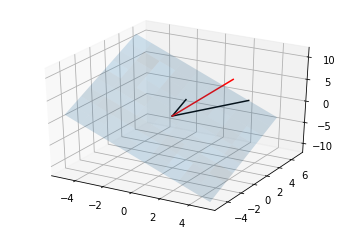

In [11]:
### The goal here is to build some geometric intuition for independence.
#   The green plane is the subspace spanned by the columns of matrix S.
#   The blue vector is a linear combination of those columns, and thus lies
#   in the same plane. The red vector cannot be expressed using the columns
#   of S and is therefore not in the plane.


# matrix S
S = np.array( [ [3,0],
                [5,2],
                [1,2] ] )

# vector v
v = np.array([[-3], [1], [5]])
v = np.array([[1], [7], [3]])


fig = plt.figure()
ax = fig.gca(projection='3d')

# draw plane corresponding to the column space
xx, yy = np.meshgrid(np.linspace(-5,5,10),np.linspace(-5,5,10))
cp = np.cross(S[:,0],S[:,1])
z1 = (-cp[0]*xx - cp[1]*yy)/cp[2]
ax.plot_surface(xx,yy,z1,alpha=.2)


## plot the two vectors from matrix S
ax.plot([0, S[0,0]],[0, S[1,0]],[0, S[2,0]],'k')
ax.plot([0, S[0,1]],[0, S[1,1]],[0, S[2,1]],'k')

# and the vector v
ax.plot([0, v[0]],[0, v[1]],[0, v[2]],'r')


# hint: uncomment the next line to see the red vector out the plane
# ax.view_init(elev=150,azim=0)
plt.show()


In [25]:
## testing for independence via matrix rank

# One definition of rank is the largest number of columns (or rows) that
# would form a linearly independent set.

# three column vectors
c1 = np.array([[ 1, 2, 3 ]]).T
c2 = np.array([[ 2, 4, 6 ]]).T
c3 = np.array([[ 2, 4, 5 ]]).T

# determine whether {c1,c2} is an independent set
print( np.linalg.matrix_rank(np.hstack((c1,c2))) )

# repeat for {c1,c3}
print( np.linalg.matrix_rank(np.hstack((c1,c3))) )

# repeat for {c1,c2,c3}
M = np.hstack((c1,c2,c3))
print( np.linalg.matrix_rank(M) )


# QUESTION: Does the rank change for transposed matrices? Try it!

1
2
2


---
# "Shifting" a matrix
---

In [26]:
# "shifting" a matrix
l = .3 # lambda
N =  5 # size of square matrix
D =  np.random.randn(N,N)  # can only shift a square matrix

# the shifting
Ds = D + l*np.eye(N)
print(Ds)

[[ 0.19605708 -0.13565215 -2.2189067  -2.88896938 -0.3276903 ]
 [ 0.21472263  0.25834029  0.12980566 -0.94074412  1.0856845 ]
 [ 0.50946611 -1.76795163  1.07552623  2.07489788  0.00381184]
 [-0.03227334  0.11866698 -1.5723943   1.0434542  -0.1845435 ]
 [-0.55515517 -0.16208539 -0.57098172 -0.63615443  0.45567164]]


In [28]:
### shifting a matrix to full-rank

# Create a reduced-rank matrix. The mechanics of why this works is from the
# theory of matrix rank. It wasn't covered in class.

# size of matrix
m = 30

# create the square symmetric matrix
A = np.random.randn(m,m)
A = np.round( 10*A.T@A )

# reduce the rank
A[:,0] = A[:,1]

# shift amount (l=lambda)
l = .01

# new matrix
B = A + l*np.eye(m,m)

# print information
print('rank(w/o shift) = %d' %np.linalg.matrix_rank(A))
print('rank(with shift) = %d' %np.linalg.matrix_rank(B))


# QUESTION: What is the smallest you can make lambda and still get a
#           full-rank matrix? (Hint: scientific notation is 1e-5 for .00001)
#           What does this tell you about making full-rank matrices?


rank(w/o shift) = 29
rank(with shift) = 30


---
# Matrix multiplications
---